In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('card_transdata.csv', header=None, low_memory=False)

In [3]:
data.drop(data.index[0], axis=0, inplace=True)
print(data.dtypes)

0    object
1    object
2    object
3    object
4    object
5    object
6    object
7    object
dtype: object


In [4]:
data[0] = data[0].astype(float)
data[1] = data[1].astype(float)
data[2] = data[2].astype(float)
data[3] = data[3].astype(float)
data[4] = data[4].astype(float)
data[5] = data[5].astype(float)
data[6] = data[6].astype(float)
data[7] = data[7].astype(float)

In [20]:
print(data.dtypes)
print(data)

0          float64
1          float64
2          float64
3          float64
4          float64
5          float64
6          float64
7          float64
z_score    float64
dtype: object
                 0         1         2    3    4    5    6    7   z_score
1        57.877857  0.311140  1.945940  1.0  1.0  0.0  0.0  0.0 -0.182849
2        10.829943  0.175592  1.294219  1.0  0.0  0.0  0.0  0.0 -0.188094
3         5.091079  0.805153  0.427715  1.0  0.0  0.0  1.0  0.0 -0.163733
4         2.247564  5.600044  0.362663  1.0  1.0  0.0  1.0  0.0  0.021806
5        44.190936  0.566486  2.222767  1.0  1.0  0.0  1.0  0.0 -0.172968
...            ...       ...       ...  ...  ...  ...  ...  ...       ...
999996    2.207101  0.112651  1.626798  1.0  1.0  0.0  0.0  0.0 -0.190529
999997   19.872726  2.683904  2.778303  1.0  1.0  0.0  0.0  0.0 -0.091035
999998    2.914857  1.472687  0.218075  1.0  1.0  0.0  1.0  0.0 -0.137903
999999    4.258729  0.242023  0.475822  1.0  0.0  0.0  1.0  0.0 -0.185523
1

In [6]:
X1 = data[0]
X2 = data[1]
X3 = data[2]

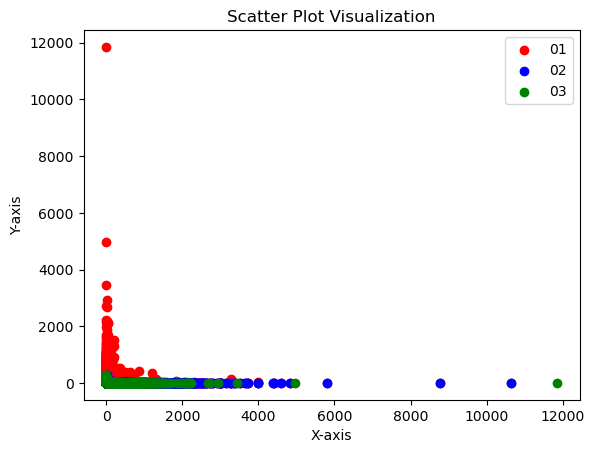

In [7]:
plt.scatter(X1, X2, color='red', label='01')
plt.scatter(X1, X3, color='blue', label='02')
plt.scatter(X2, X3, color='green', label='03')
plt.title("Scatter Plot Visualization")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x249455da740>,
 'caps': [<matplotlib.lines.Line2D at 0x249455dac80>,
 'boxes': [<matplotlib.lines.Line2D at 0x249455da470>],
 'medians': [<matplotlib.lines.Line2D at 0x249455dac50>],
 'fliers': [<matplotlib.lines.Line2D at 0x249455dafe0>],
 'means': []}

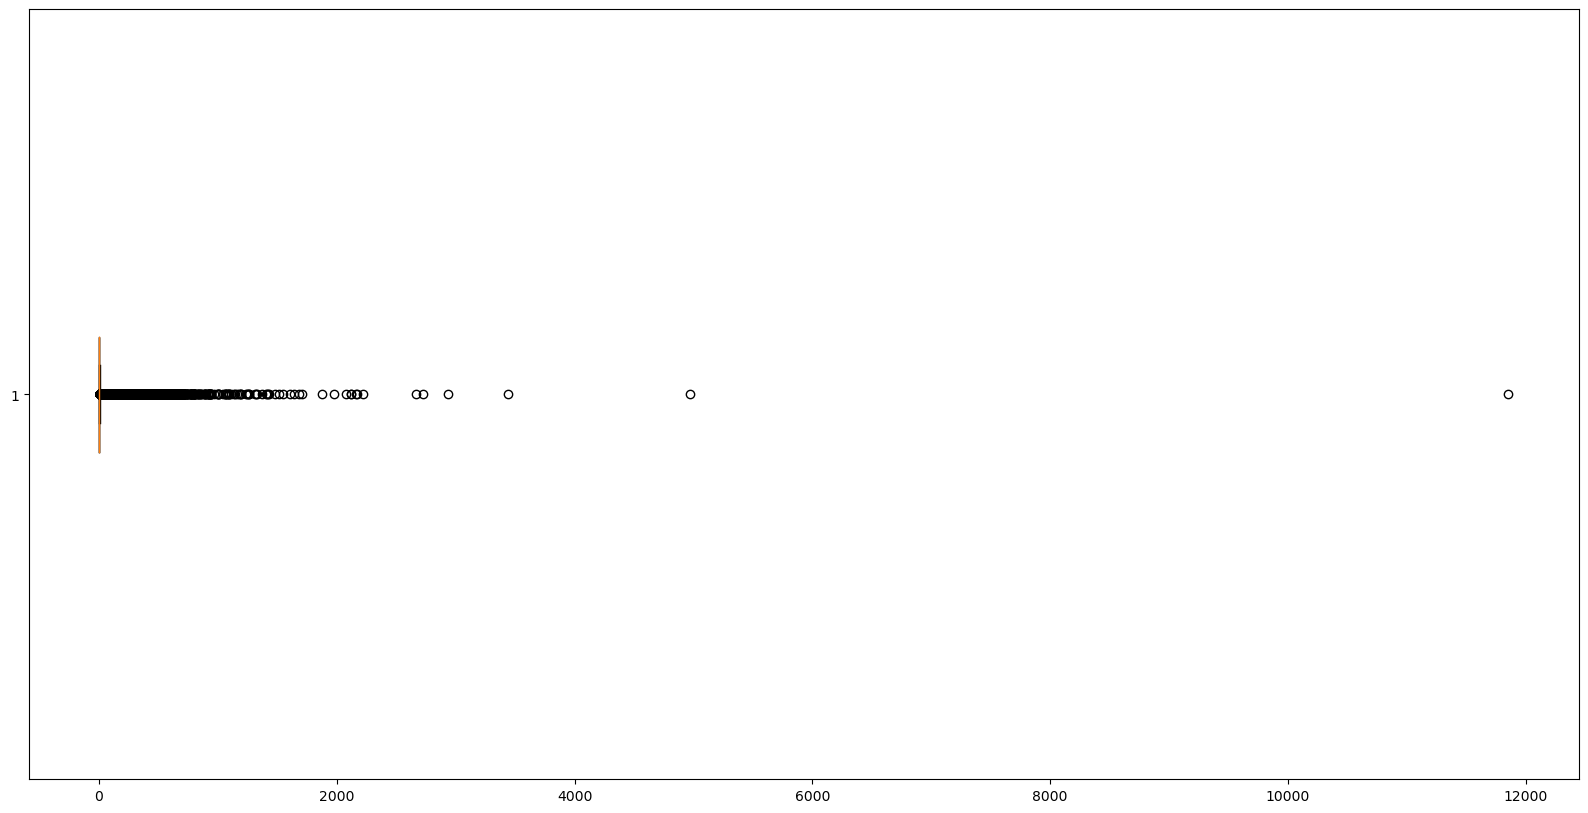

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(data[1], vert=False)

In [9]:
q1 = data[1].quantile(0.25)
q3 = data[1].quantile(0.75)
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr

In [10]:
print("Upper Whisker:", upper_whisker)
print("Lower Whisker:", lower_whisker)

Upper Whisker: 7.944363262531519
Lower Whisker: -4.291944930383116


In [11]:
mean = data[1].mean()
std = data[1].std()
data['z_score'] = (data[1] - mean) / std

In [12]:
threshold = 3
outliers = data[np.abs(data['z_score']) > threshold]
ndata = data[np.abs(data['z_score']) <= threshold]
print("Outliers:", outliers)

Outliers:                 0           1         2    3    4    5    6    7    z_score
30      15.694986  175.989182  0.855623  1.0  0.0  0.0  1.0  1.0   6.615023
156      3.357481  990.070315  3.157890  1.0  0.0  0.0  0.0  0.0  38.115940
188     20.141476  116.562477  1.172999  1.0  0.0  0.0  1.0  1.0   4.315503
398     14.737292  132.034827  1.123251  1.0  1.0  0.0  0.0  0.0   4.914207
471     19.256250  108.493062  1.015925  1.0  0.0  0.0  0.0  0.0   4.003257
...           ...         ...       ...  ...  ...  ...  ...  ...        ...
999314   8.322145   83.175253  3.935395  1.0  0.0  0.0  0.0  0.0   3.023583
999338  19.827392  207.367978  1.481973  1.0  1.0  0.0  0.0  0.0   7.829228
999580  15.148551  425.382286  0.817518  1.0  1.0  0.0  0.0  0.0  16.265304
999704   8.861100   85.627567  5.528836  1.0  1.0  0.0  1.0  1.0   3.118475
999870  58.359075  210.755452  1.778183  1.0  0.0  0.0  1.0  1.0   7.960306

[7099 rows x 9 columns]


In [13]:
print(ndata.dtypes)

0          float64
1          float64
2          float64
3          float64
4          float64
5          float64
6          float64
7          float64
z_score    float64
dtype: object


In [14]:
x = ndata.iloc[:,:6].values
y = ndata.iloc[:, 7].values

In [15]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
model = Sequential()
model.add(Dense(units=5, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
12412/12412 [==============================] - 19s 1ms/step - loss: 0.1599 - accuracy: 0.9298 - val_loss: 0.1071 - val_accuracy: 0.9456
Epoch 2/15
12412/12412 [==============================] - 18s 1ms/step - loss: 0.1042 - accuracy: 0.9465 - val_loss: 0.1038 - val_accuracy: 0.9460
Epoch 7/15
12412/12412 [==============================] - 18s 1ms/step - loss: 0.1040 - accuracy: 0.9464 - val_loss: 0.1038 - val_accuracy: 0.9468
Epoch 8/15
12412/12412 [==============================] - 18s 1ms/step - loss: 0.1040 - accuracy: 0.9467 - val_loss: 0.1037 - val_accuracy: 0.9466
Epoch 9/15
12412/12412 [==============================] - 18s 1ms/step - loss: 0.1039 - accuracy: 0.9468 - val_loss: 0.1035 - val_accuracy: 0.9477
Epoch 10/15
12412/12412 [==============================] - 18s 1ms/step - loss: 0.1039 - accuracy: 0.9468 - val_loss: 0.1040 - val_accuracy: 0.9451
Epoch 11/15
12412/12412 [==============================] - 19s 2ms/step - loss: 0.1039 - accuracy: 0.9467 - val_loss:

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy', test_acc)

6206/6206 [==============================] - 7s 1ms/step - loss: 0.1033 - accuracy: 0.9476
Test Accuracy 0.9476233720779419
